###OPIS CECH DATASETU SAMOCHODÓW

Feature | Type    | Opis
--------|---------|----------------------------------------------------
Price   | Integer | Cena sprzedaży pojazdu w ogłoszeniu
Years   | Integer | Rocznik pojazdu
Brand   | String  | Marka samochodu
Model   | String  | Model pojazdu
Color   | String  | Kolor pojazdu
State/Country  | String  | Lokalizacja, w której samochód jest dostępny
Mileage | Float   | Przebieg pojazdu (mile przejechane przez pojazd)
Vin     | String  | Numer identyfikacyjny pojazdu (cyfr i wielkich liter)
Title_status   | String  | Stanu pojazdu
Lot     | Integer | Numer identyfikacyjny pojazdu
Condition| String | Ilość czasu przez jaki pojazd będzie widniał na stronie aukcyjnej


###Import bibiliotek i wczytanie dataset'u

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/USA_cars_datasets.csv')

###Wyświetlenie wiadomośći o datasecie

In [ ]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [ ]:
df.shape

(2499, 12)

In [ ]:
df.isna().sum()

,0
price,0
brand,0
model,0
year,0
title_status,0
mileage,0
color,0
vin,0
lot,0
state,0


In [ ]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_num.corr()['price']

,price
price,1.000000
year,0.418274
mileage,-0.400838
lot,0.159369


In [ ]:
df_num.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [ ]:
df_cat.describe()

,brand,model,title_status,color,vin,state,country,condition
count,2499,2499,2499,2499,2499,2499,2499,2499
unique,28,127,2,49,2495,44,2,47
top,ford,door,clean vehicle,white,1gnevhkw8jj148388,pennsylvania,usa,2 days left
freq,1235,651,2336,707,2,299,2492,832


##Feature Engineering

In [ ]:
for col in df_cat.columns:
  print(f'{col}: ', df[col].unique())

brand:  ['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram']
model:  ['cruiser' 'se' 'mpv' 'door' '1500' 'pk' 'malibu' 'coupe' 'wagon' 'forte'
 'encore' 'sorento' 'doors' 'chassis' 'q70' 'camaro' 'convertible' 'vans'
 'srw' 'compass' 'enclave' '300' 'cherokee' 'pacifica' 'x3' 'equinox'
 'challenger' 'm' 'colorado' 'focus' 'durango' 'escape' 'charger'
 'explorer' 'f-150' '3500' 'caravan' 'van' 'dart' '2500' 'esv' 'cutaway'
 'el' 'edge' 'series' 'flex' 'srx' 'cab' 'pickup' 'vehicl' 'trax' 'tahoe'
 'suburban' 'cargo' 'drw' 'fiesta' 'impala' 'soul' 'elantra' 'pioneer'
 'trail' 'traverse' 'country' 'sundance' 'road/street' 'nautilus' 'gx'
 'q5' 'gle' 'sportage' '5' 'sport' 'discovery' 'acadia' 'ghibli' 'glc'
 'e-class' 'truck' 'utility' 'limited' 'sl-class' 'cx-3' '2500hd' 'sonic'


In [ ]:
df_copy.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'state',
       'country', 'color_group'],
      dtype='object')

###Usunięcie marek, których liczba samochodów na aukcji jest bardzo mała

In [ ]:
###Ze względu na dosyć niską ilość samochodów niektórych marek usuwam je
brands = df['brand'].value_counts() < 100
brands = brands.reset_index()
brands_to_del = brands[brands['count'] ==True]['brand'].tolist()

df_copy = df.copy()
df_copy = df_copy[~df_copy['brand'].isin(brands_to_del)]
df_copy['brand'].value_counts()
df_copy.columns
df_copy.drop(columns=['vin', 'condition', 'lot'], inplace=True)

###Price

In [ ]:
df_copy = df_copy[df_copy['price'] > 1000]

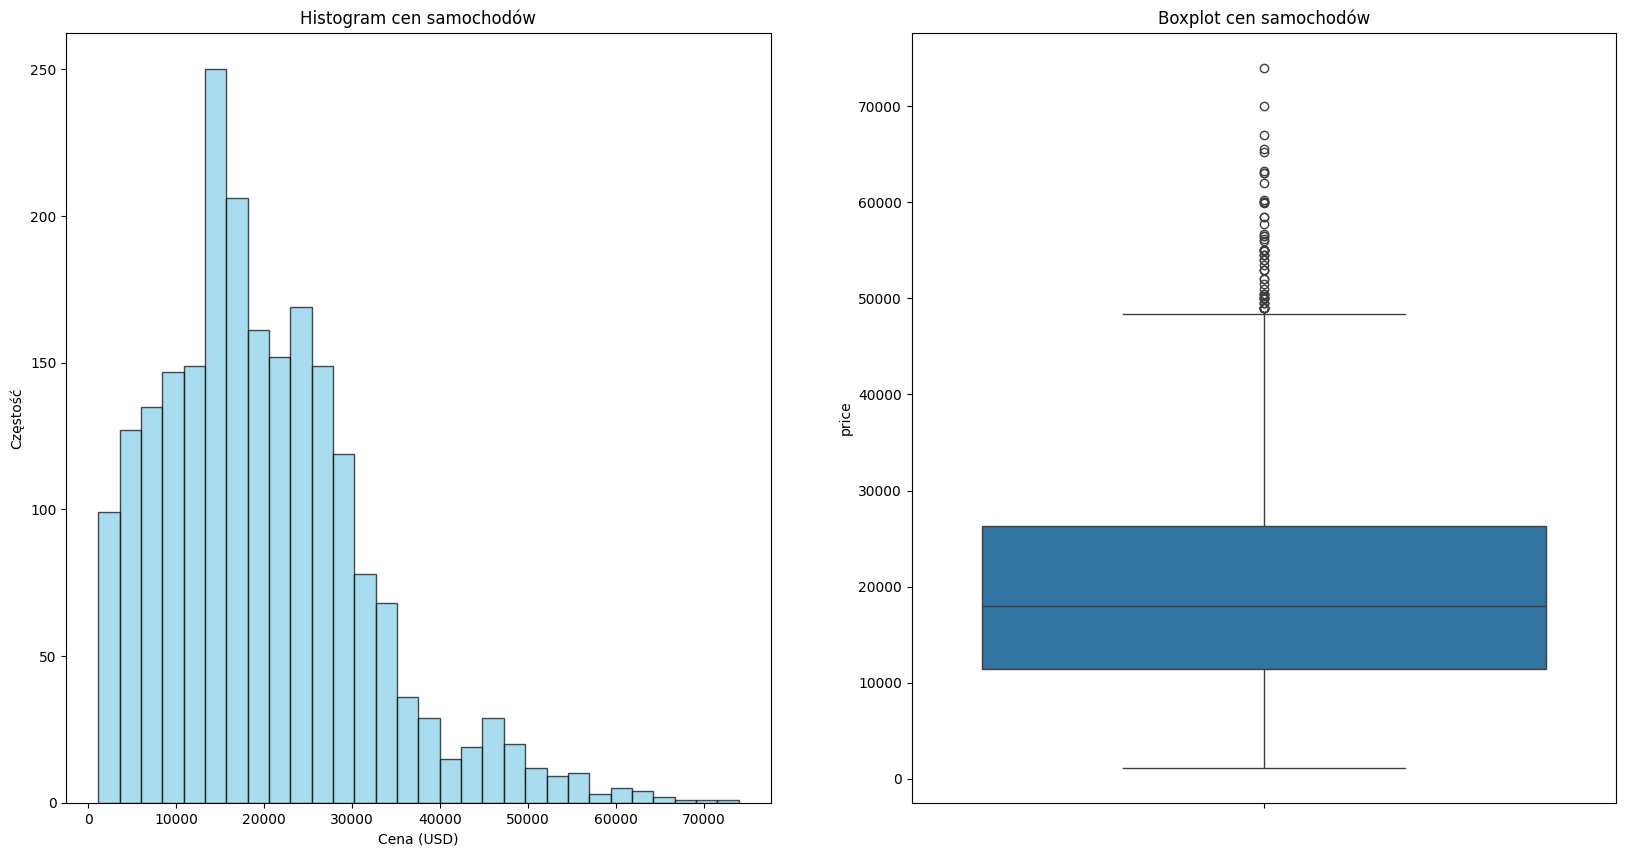

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(df_copy['price'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram cen samochodów')
plt.xlabel('Cena (USD)')
plt.ylabel('Częstość')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_copy['price'])
plt.title('Boxplot cen samochodów')
plt.show()

Test Shapiro-Wilka:
Statystyka: 0.9477
p-value: 0.000000
Rozkład normalny: NIE


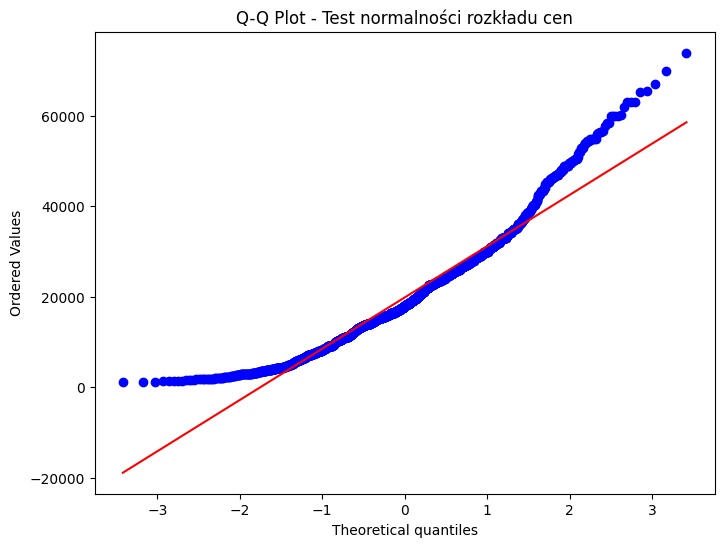

In [ ]:
from scipy.stats import shapiro, normaltest, kstest
import scipy.stats as stats

stat, p_value = shapiro(df_copy['price'][:5000])
print(f"Test Shapiro-Wilka:")
print(f"Statystyka: {stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Rozkład normalny: {'TAK' if p_value > 0.05 else 'NIE'}")

plt.figure(figsize=(8, 6))
stats.probplot(df_copy['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Test normalności rozkładu cen')
plt.show()

###Brand

In [ ]:
df.brand.value_counts()

,count
brand,
ford,1235
dodge,432
nissan,312
chevrolet,297
gmc,42
jeep,30
chrysler,18
bmw,17
hyundai,15


In [ ]:
###Ze względu na dosyć niską ilość samochodów niektórych marek usuwam je
brands = df['brand'].value_counts() < 100
brands = brands.reset_index()
brands_to_del = brands[brands['count'] ==True]['brand'].tolist()

df_copy = df.copy()
df_copy = df_copy[~df_copy['brand'].isin(brands_to_del)]
df_copy['brand'].value_counts()
df_copy.columns
df_copy.drop(columns=['vin', 'condition', 'lot'], inplace=True)

In [ ]:
df_copy.head()

,price,brand,model,year,title_status,mileage,color,state,country
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,texas,usa


<Axes: xlabel='year', ylabel='price'>

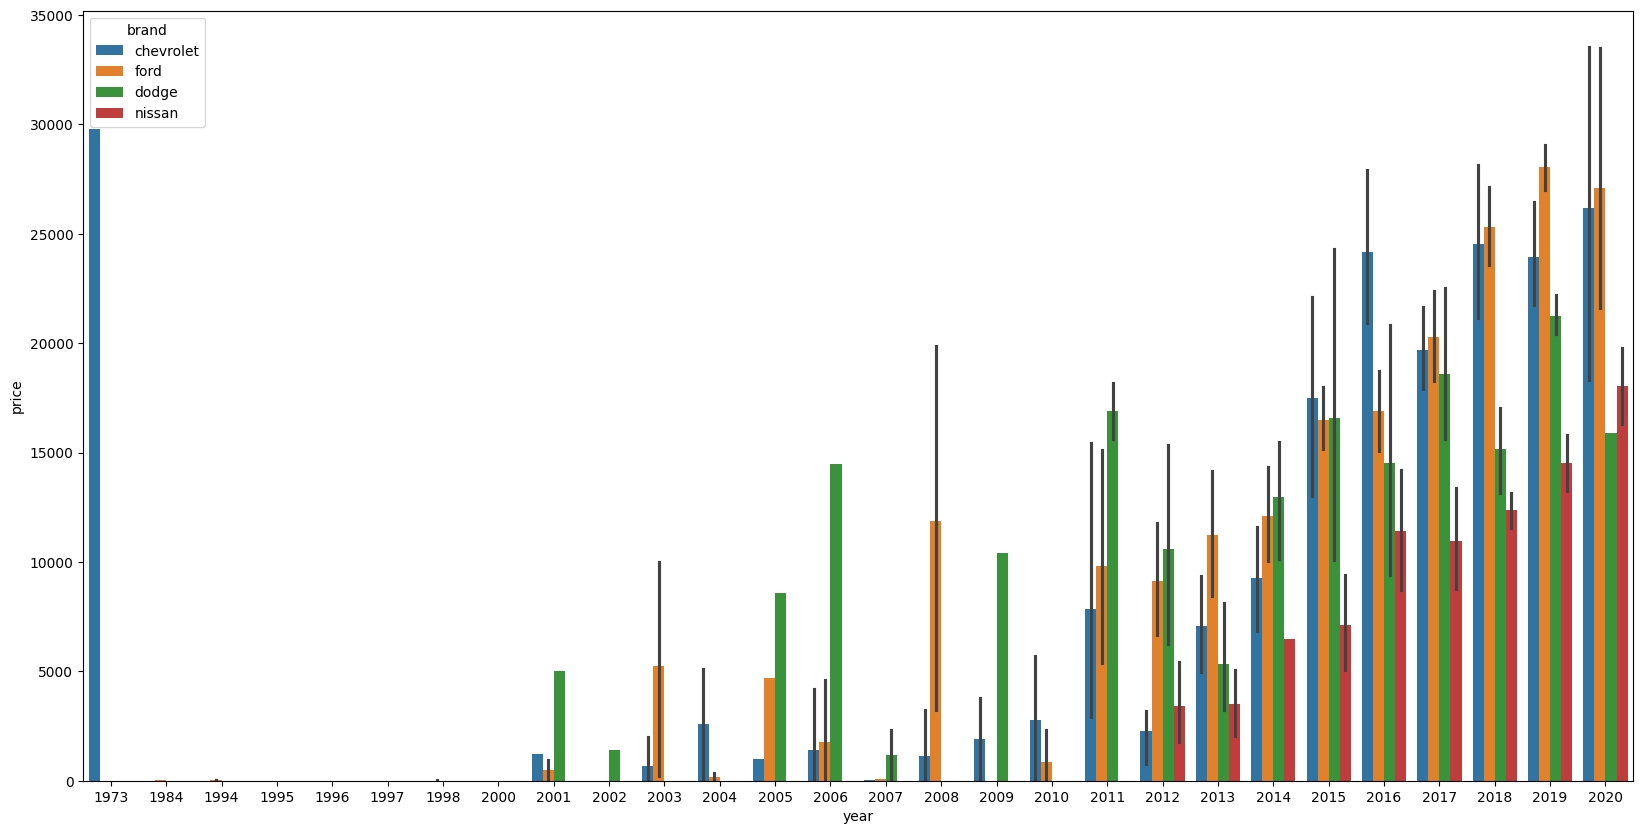

In [ ]:
#Wykres słupkowy średnich cen samochodów według marek i roczników
plt.figure(figsize=(20,10))
sns.barplot(data=df_copy, x='year', y='price', hue='brand')

Widoczny jest wyraźny trend wzrostowy cen wraz z nowszymi rocznikami.
Rosnące słupki błędów dla nowszych roczników wskazują na większy rozrzut cen.
Chevrolet charakteryzuje się największym rozrzutem cenowym
Najstarszy dostępny rocznik marki samochodu Nissan jest dopiero z 2012 roku. Roczniki sprzed 2001 roku można pominąć ze względu na minimajną ilośc pojazdów

In [ ]:
df_copy[df_copy.year < 2001]

,price,brand,model,year,title_status,mileage,color,state,country
32,29800,chevrolet,camaro,1973,clean vehicle,46226.0,red,pennsylvania,usa
285,0,ford,door,2000,salvage insurance,124969.0,black,oklahoma,usa
293,0,chevrolet,pickup,1998,salvage insurance,258631.0,gray,texas,usa
313,0,ford,van,1998,salvage insurance,186855.0,blue,california,usa
322,0,ford,chassis,1994,salvage insurance,0.0,green,california,usa
323,0,ford,door,1997,salvage insurance,203297.0,green,minnesota,usa
330,0,ford,door,1996,salvage insurance,296860.0,green,california,usa
362,25,ford,pickup,1994,salvage insurance,206162.0,white,georgia,usa
370,0,ford,door,1997,salvage insurance,146912.0,green,wisconsin,usa
371,0,ford,door,1998,salvage insurance,131367.0,white,illinois,usa


In [ ]:
df_copy = df_copy[df_copy.year >= 2001]

In [ ]:
df_copy[df_copy.year < 2001]

,price,brand,model,year,title_status,mileage,color,state,country


<Axes: xlabel='brand', ylabel='price'>

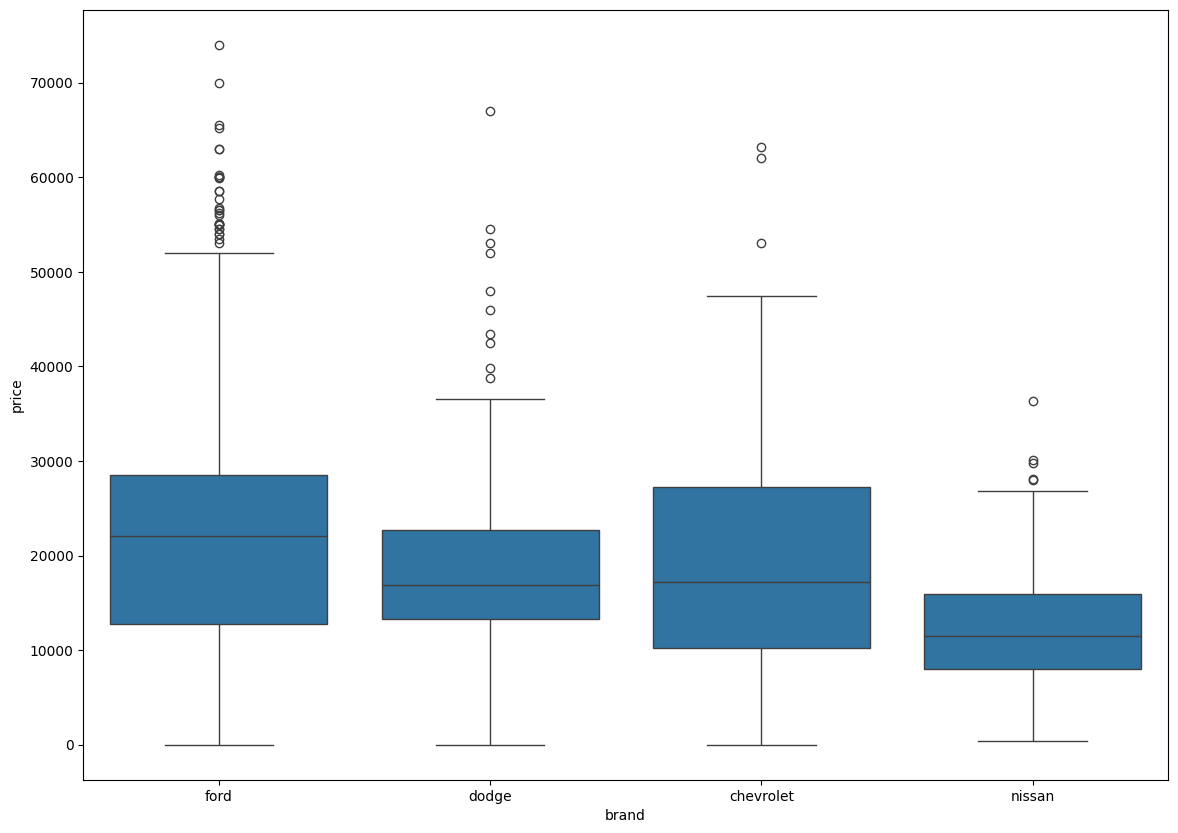

In [ ]:
# Wykres ramka-wasy pokazuje rozkład cen samochodów według marek.
plt.figure(figsize=(14,10))
sns.boxplot(data=df_copy, x='brand', y='price')

Ford ma najwyższą medianę cen (~22000) i największy rozrzut wartości.
Nissan jest najtańszą marką z medianą około 12000 i najmniejszym rozrzutem.
Wszystkie marki mają outliery, szczególnie w górnych przedziałach cenowych.
Chevrolet ma podobny rozrzut do Forda, ale niższą medianę.

###Country

In [ ]:
df_copy.value_counts('country').index

Index([' usa', ' canada'], dtype='object', name='country')

In [ ]:
###Samochodów wystawionych w Kanadzie jest tylko 7 na 2663 ogłoszeń, można usunąć ogłoszenia z tego Państwa i skupić się tylko na rynku z USA
df_copy = df_copy[df_copy['country']==' usa']
df_copy.value_counts('country')

,count
country,
usa,2255


###Mileage



Text(0.5, 1.0, 'Wykres punktowy zależność między przebiegiem a ceną samochodów')

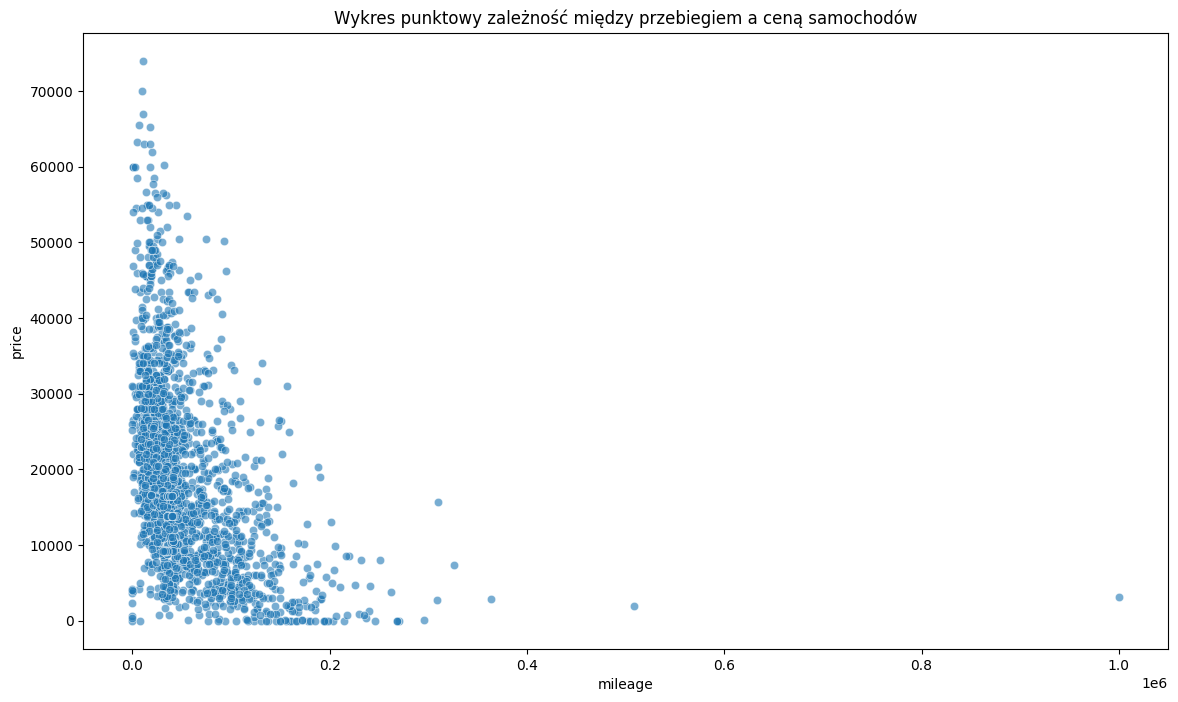

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df_copy, x='mileage', y='price', alpha=0.6)
plt.title('Wykres punktowy zależność między przebiegiem a ceną samochodów')

Negatywna korelacja - większy przebieg = niższa cena.
Większość samochodów koncentruje się w przedziale 0-200k mil przebiegu.
Samochody z niskim przebiegiem (<100k mil) wykazują największą różnorodność cen (0-75k).
Najdroższe samochody (>50k) mają bardzo niski przebieg, lub zerowy co wskazuje na to że najdroższe samochody są prosto z fabryki.

###Title Status

In [ ]:
df_copy.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country'],
      dtype='object')

Text(0.5, 1.0, 'Wykres słupkowy ceny w zależności od rocznika samochodu i stanu pojazdu')

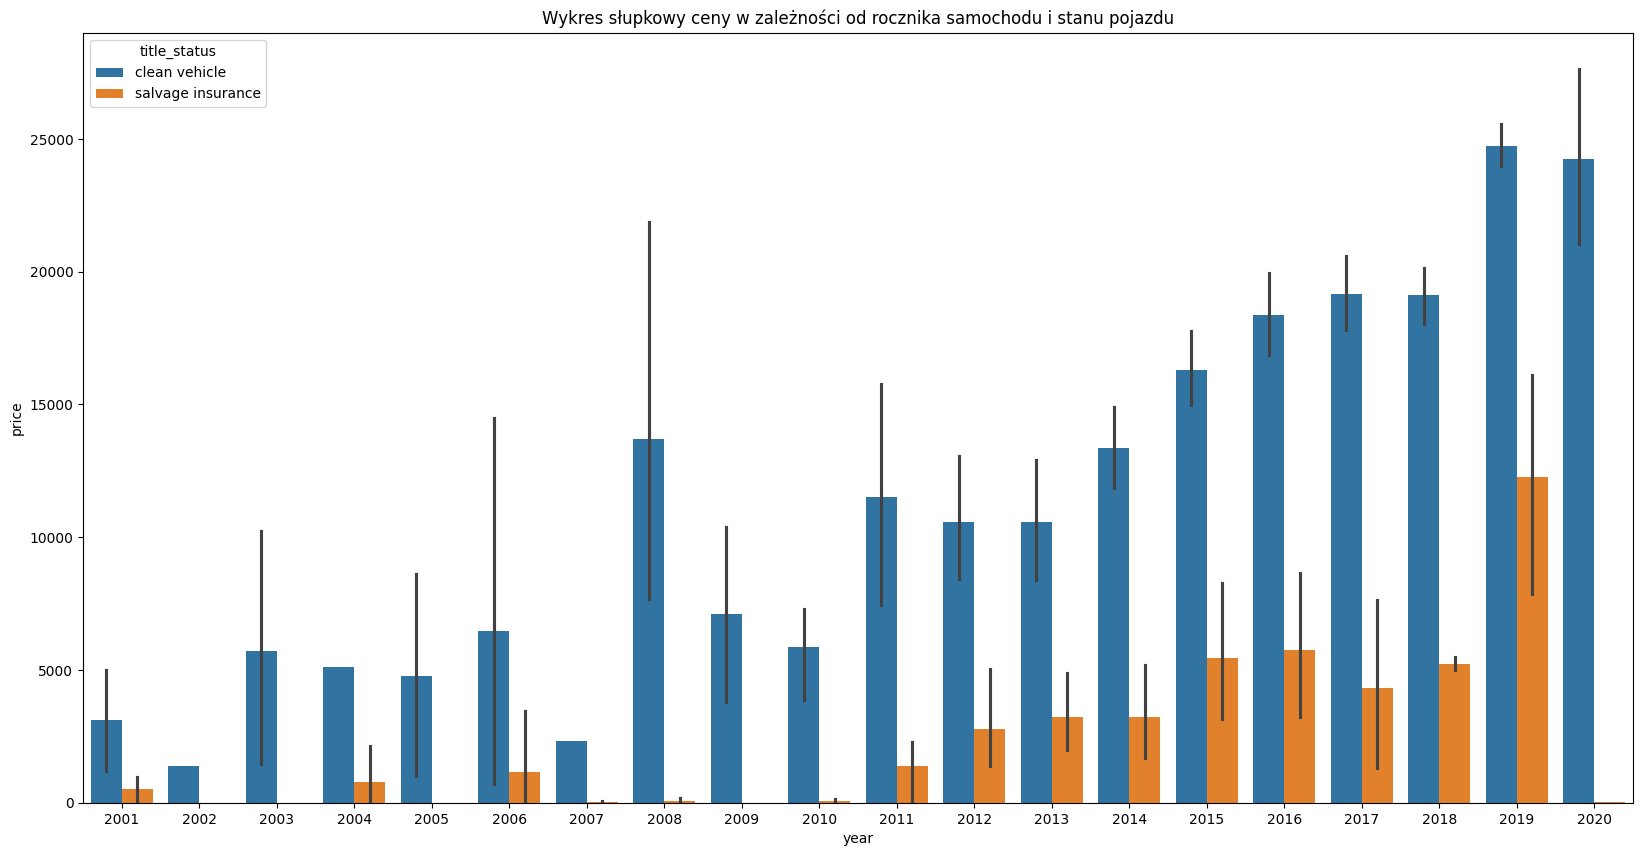

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_copy, x='year', y='price', hue='title_status')
plt.title('Wykres słupkowy ceny w zależności od rocznika samochodu i stanu pojazdu')

Samochody, które nie doświadczyły szkód są średnio 3/5 razy droższe od uszkodzonych.

###Colors

In [ ]:
df_copy['color'].unique()

array(['silver', 'blue', 'red', 'white', 'black', 'orange', 'gray',
       'no_color', 'gold', 'turquoise', 'beige', 'brown', 'green',
       'dark blue', 'maroon', 'yellow', 'charcoal', 'toreador red',
       'bright white clearcoat', 'billet silver metallic clearcoat',
       'black clearcoat', 'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'color:', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [ ]:
def group_colors(color):
    color = color.lower().strip()

    if any(word in color for word in ['black', 'charcoal', 'phantom']):
        return 'Black/Dark'

    elif any(word in color for word in ['white', 'off-white', 'bright white']):
        return 'White'

    elif any(word in color for word in ['blue', 'navy']):
        return 'Blue'

    elif any(word in color for word in ['red', 'crimson', 'ruby']):
        return 'Red'

    elif any(word in color for word in ['silver', 'gray', 'grey', 'metallic', 'platinum']):
        return 'Silver/Gray'

    elif any(word in color for word in ['gold', 'beige', 'tan', 'burgundy']):
        return 'Gold/Beige'

    elif any(word in color for word in ['green']):
        return 'Green'

    elif any(word in color for word in ['orange', 'yellow']):
        return 'Orange/Yellow'

    else:
        return 'Other'

df_copy['color_group'] = df_copy['color'].apply(group_colors)

print(df_copy['color_group'].value_counts())
df_copy.drop(columns=['color'], inplace=True)

color_group
White            669
Silver/Gray      640
Black/Dark       496
Red              175
Blue             137
Other             75
Orange/Yellow     28
Gold/Beige        20
Green             15
Name: count, dtype: int64


In [ ]:
##Ze względu na stosunkową ilość niektórych kolorów, nie zostaną one uwzględnione
group_colors_df = df_copy['color_group'].value_counts().reset_index()
colors_to_keep = group_colors_df[group_colors_df['count'] > 100].color_group.tolist()
df_copy = df_copy[df_copy['color_group'].isin(colors_to_keep)]
df_copy.shape

(2117, 9)

<Axes: xlabel='color_group', ylabel='price'>

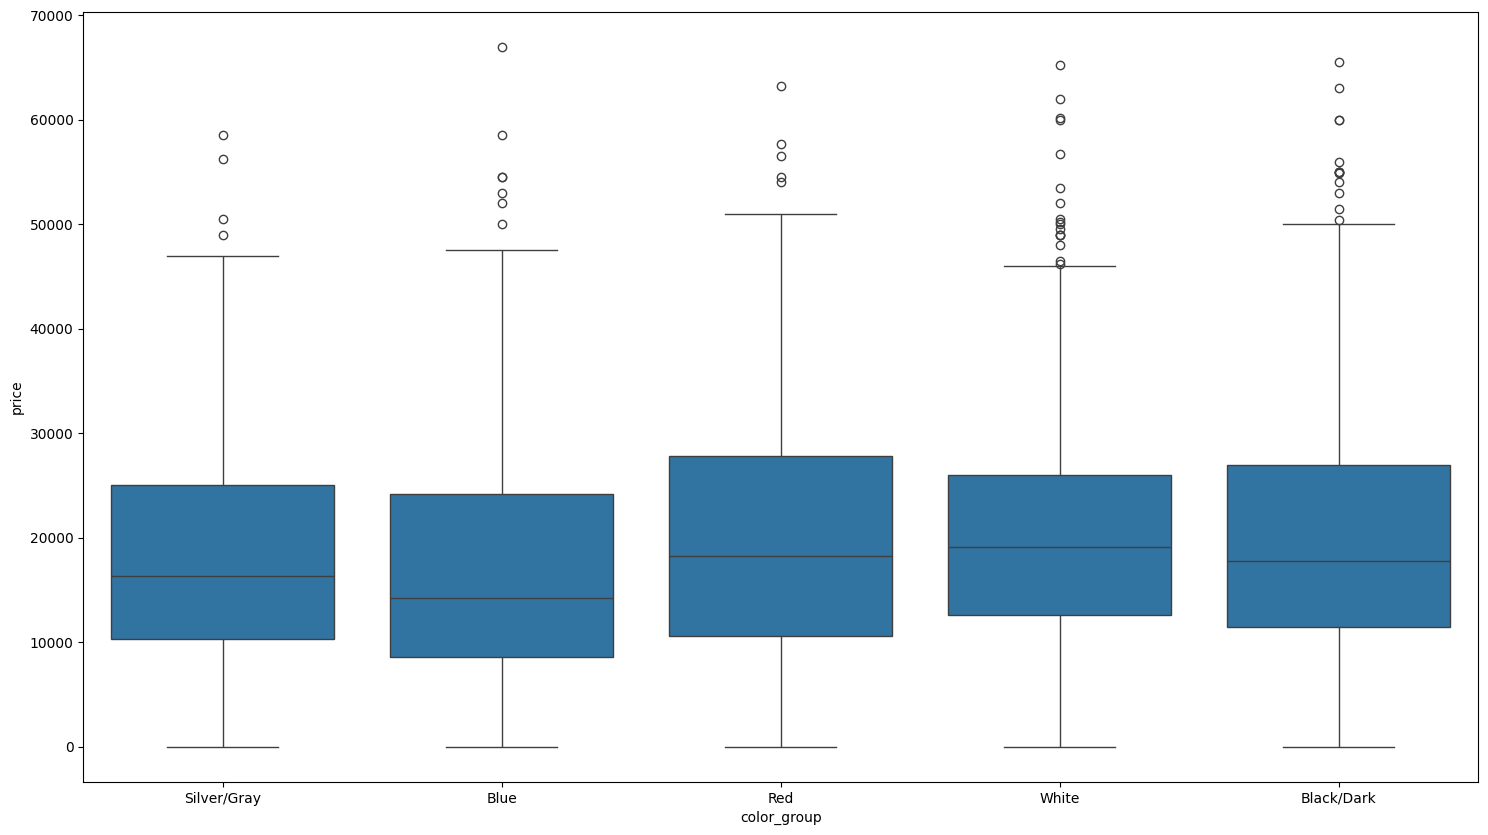

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df_copy,x='color_group', y='price')

Różnice cen dla róznych kolorów są znikome

<Axes: xlabel='year', ylabel='price'>

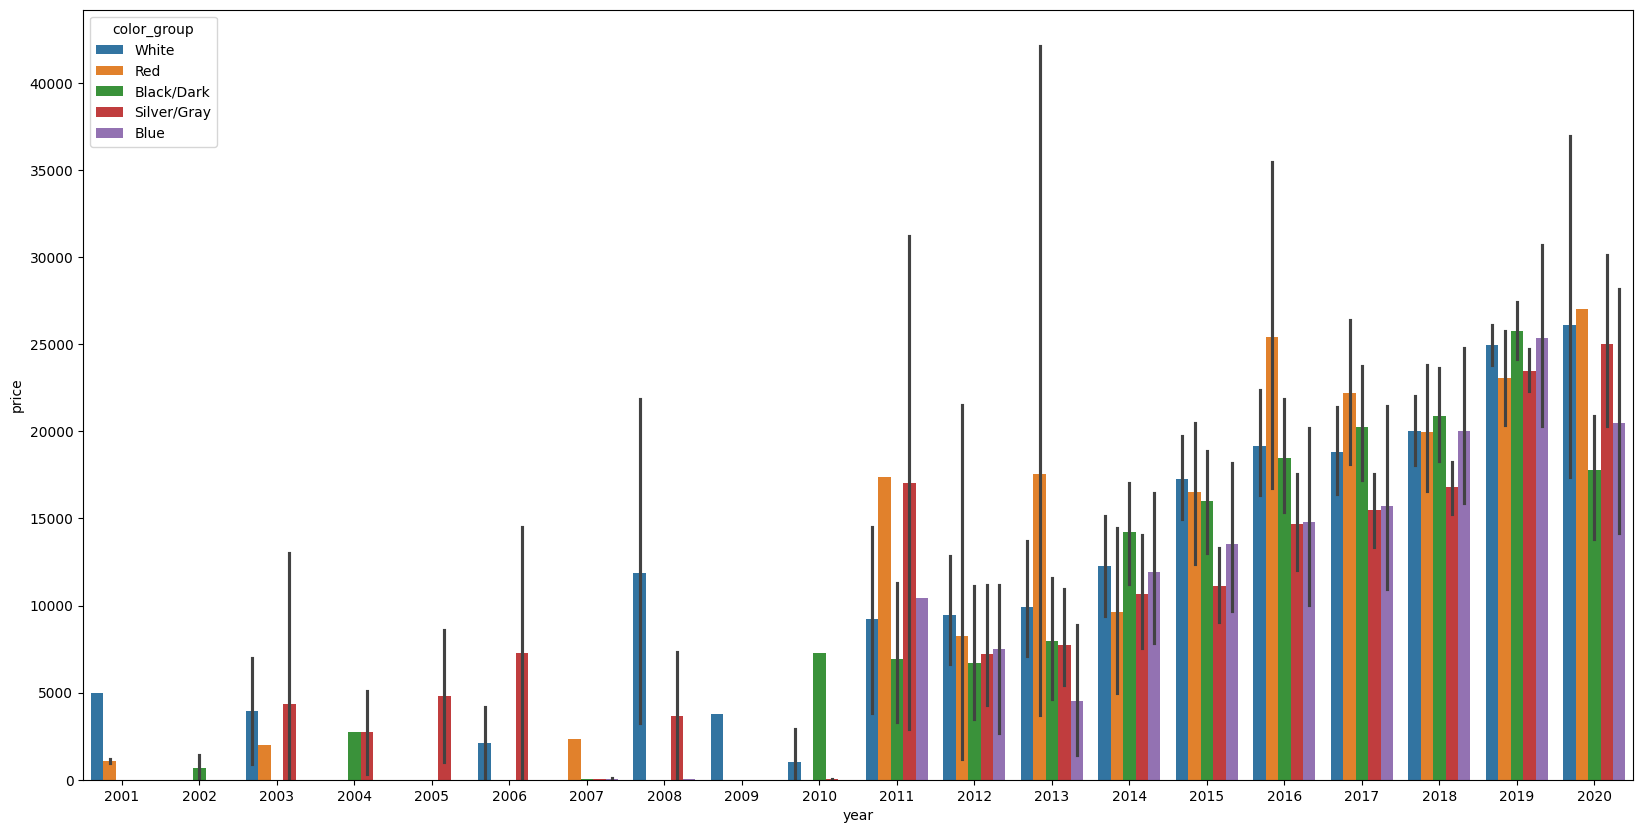

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_copy, x='year', y='price', hue='color_group')

Wszystkie z analizowanych kolorów pojawiają się rok do roku od 2011 roku, wcześniej dominowały głównie kolory: czerwony, niebieski

###State

In [ ]:
df_copy.state.unique()

array(['tennessee', 'georgia', 'virginia', 'florida', 'texas', 'ohio',
       'pennsylvania', 'michigan', 'south carolina', 'washington', 'utah',
       'new york', 'kentucky', 'arizona', 'missouri', 'minnesota',
       'arkansas', 'california', 'colorado', 'illinois', 'new jersey',
       'maryland', 'oklahoma', 'wisconsin', 'oregon', 'nebraska',
       'indiana', 'west virginia', 'nevada', 'kansas', 'north carolina',
       'massachusetts', 'connecticut', 'rhode island', 'louisiana',
       'alabama', 'mississippi', 'new mexico', 'idaho', 'new hampshire',
       'montana', 'vermont'], dtype=object)

In [ ]:
df_copy.state.value_counts()

,count
state,
pennsylvania,274
florida,204
texas,188
california,141
michigan,137
north carolina,122
minnesota,113
illinois,99
nevada,84


##Model

In [ ]:
df_copy.head()

,price,brand,model,year,title_status,mileage,state,country,color_group
1,2899,ford,se,2011,clean vehicle,190552.0,tennessee,usa,Silver/Gray
2,5350,dodge,mpv,2018,clean vehicle,39590.0,georgia,usa,Silver/Gray
3,25000,ford,door,2014,clean vehicle,64146.0,virginia,usa,Blue
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,florida,usa,Red
5,5700,dodge,mpv,2018,clean vehicle,45561.0,texas,usa,White


In [ ]:
### Przekształcenie roku aby odpowiadał latom od ilu samochód jest na rynku
df_copy['year'] = df_copy['year'] - df_copy['year'].min()

In [ ]:
df_copy.describe()

,price,year,mileage
count,2117.000000,2117.000000,2117.000000
mean,19294.426547,16.044875,49430.370808
std,11695.561186,2.631309,48122.625715
min,0.000000,0.000000,0.000000
25%,10900.000000,15.000000,21101.000000
50%,17500.000000,17.000000,35233.000000
75%,26000.000000,18.000000,61168.000000
max,67000.000000,19.000000,999999.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
X = df_copy.drop(columns=['price'])
y = df_copy['price']

In [ ]:
df_num_copy_col = X.select_dtypes(include=['number']).columns.tolist()
df_cat_copy_col = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
X.shape

(2117, 8)

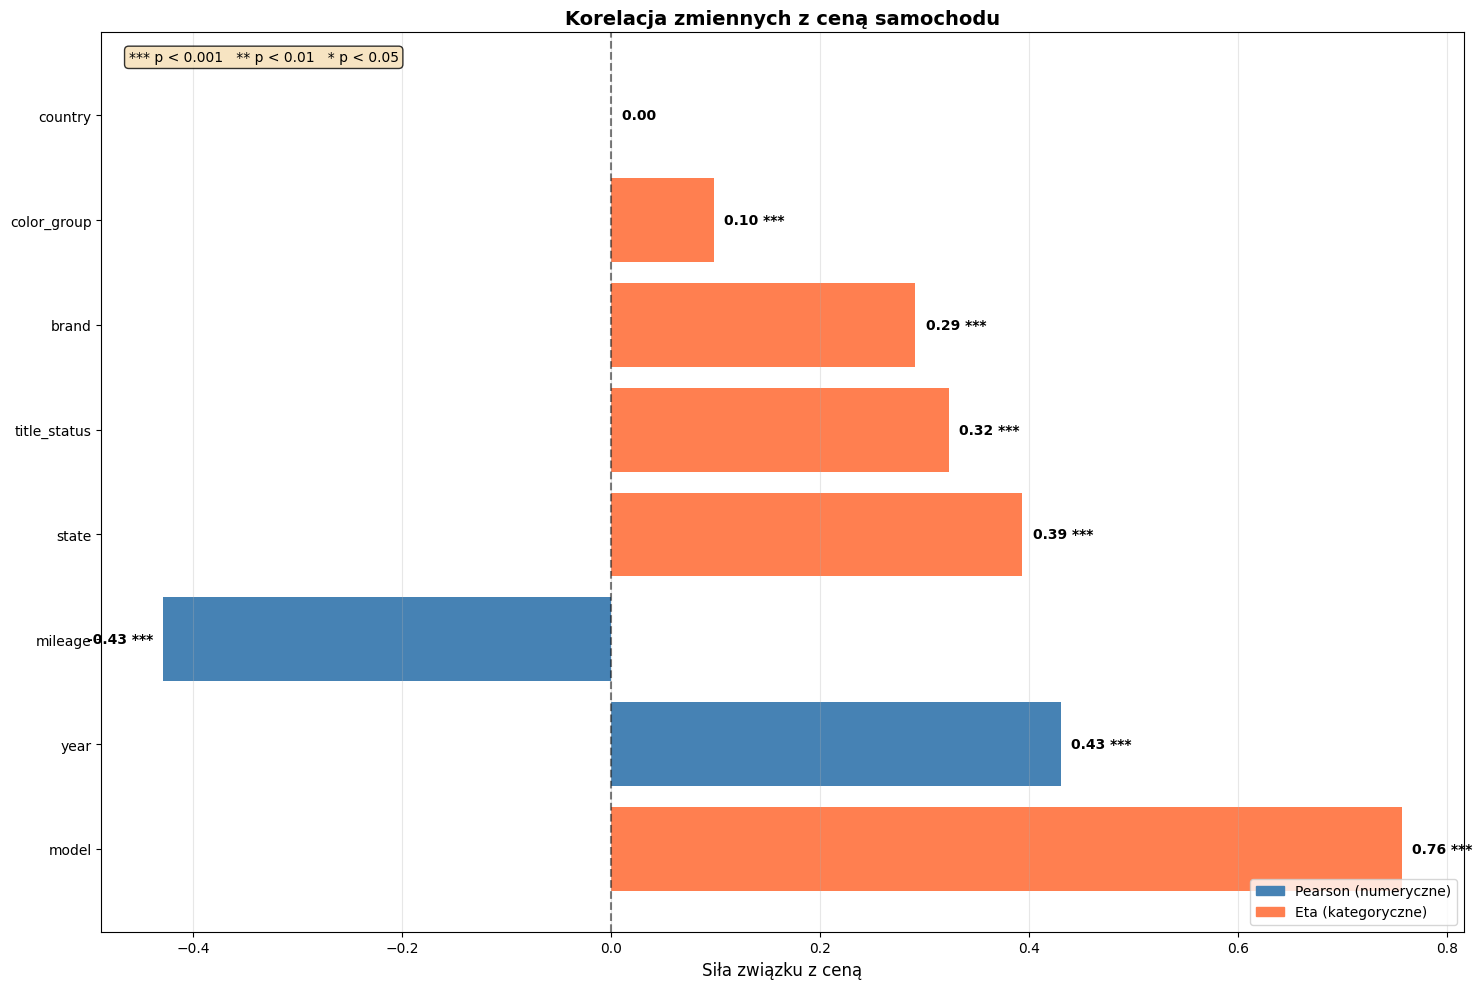

PODSUMOWANIE NAJWAŻNIEJSZYCH KORELACJI
Zmienna         Typ      Korelacja  p-value    Znaczenie
--------------------------------------------------------------------------------
model           Eta      0.756      0.000      ***
year            Pearson  0.430      0.000      ***
mileage         Pearson  -0.429     0.000      ***
state           Eta      0.393      0.000      ***
title_status    Eta      0.323      0.000      ***
brand           Eta      0.291      0.000      ***
color_group     Eta      0.098      0.000      ***
country         Eta      0.000      1.000      


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

def eta_squared(continuous, categorical):
    """Eta squared - siła związku kategoryczna-numeryczna"""
    try:
        mask = continuous.notna() & categorical.notna()
        cont_clean = continuous[mask]
        cat_clean = categorical[mask]

        if len(cont_clean) == 0:
            return 0

        groups = [cont_clean[cat_clean == cat]
                 for cat in cat_clean.unique()]
        groups = [g for g in groups if len(g) > 0]

        if len(groups) < 2:
            return 0

        grand_mean = cont_clean.mean()
        ss_total = np.sum((cont_clean - grand_mean) ** 2)

        if ss_total == 0:
            return 0

        ss_between = 0
        for group in groups:
            if len(group) > 0:
                group_mean = group.mean()
                ss_between += len(group) * (group_mean - grand_mean) ** 2

        eta_sq = ss_between / ss_total
        return np.sqrt(eta_sq)
    except Exception as e:
        print(f"Błąd w eta_squared: {e}")
        return 0

def cramers_v(x, y):
    """Cramér's V - siła związku kategoryczna-kategoryczna"""
    try:
        mask = x.notna() & y.notna()
        x_clean = x[mask]
        y_clean = y[mask]

        if len(x_clean) == 0:
            return 0

        confusion_matrix = pd.crosstab(x_clean, y_clean)
        chi2, _, _, _ = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()

        if n == 0:
            return 0

        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)

        denominator = min((kcorr-1), (rcorr-1))
        if denominator <= 0:
            return 0

        return np.sqrt(phi2corr / denominator)
    except Exception as e:
        print(f"Błąd w cramers_v: {e}")
        return 0

# OBLICZANIE KORELACJI
price_correlations = {}

# Zmienne numeryczne z ceną (Pearson)
for col in df_num_copy_col:
    try:
        corr, p_val = pearsonr(df_copy[col], df_copy['price'])
        price_correlations[col] = {
            'correlation': corr,
            'p_value': p_val,
            'type': 'Pearson',
            'abs_corr': abs(corr)
        }
    except Exception as e:
        print(f"Błąd dla {col}: {e}")

# Zmienne kategoryczne z ceną (Eta squared)
for col in df_cat_copy_col:
    try:
        eta = eta_squared(df_copy['price'], df_copy[col])

        groups = [df_copy[df_copy[col] == cat]['price'].values
                  for cat in df_copy[col].unique()]
        groups = [g for g in groups if len(g) > 0]

        if len(groups) >= 2:
            f_stat, p_val = f_oneway(*groups)
        else:
            p_val = 1.0

        price_correlations[col] = {
            'correlation': eta,
            'p_value': p_val,
            'type': 'Eta',
            'abs_corr': abs(eta)
        }

    except Exception as e:
        print(f"Błąd dla {col}: {e}")

price_corr_df = pd.DataFrame(price_correlations).T
price_corr_df = price_corr_df.sort_values('abs_corr', ascending=False)


plt.figure(figsize=(15, 10))

top_vars = price_corr_df.head(15)
colors = ['steelblue' if t == 'Pearson' else 'coral' for t in top_vars['type']]

bars = plt.barh(range(len(top_vars)), top_vars['correlation'], color=colors)

for i, (idx, row) in enumerate(top_vars.iterrows()):
    significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""

    text_x = row['correlation'] + 0.01 if row['correlation'] >= 0 else row['correlation'] - 0.01
    plt.text(text_x, i, f"{row['correlation']:.2f} {significance}",
             va='center', ha='left' if row['correlation'] >= 0 else 'right',
             fontweight='bold')

plt.yticks(range(len(top_vars)), top_vars.index)
plt.xlabel('Siła związku z ceną', fontsize=12)
plt.title('Korelacja zmiennych z ceną samochodu', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

from matplotlib.patches import Rectangle
legend_elements = [
    Rectangle((0,0),1,1, color='steelblue', label='Pearson (numeryczne)'),
    Rectangle((0,0),1,1, color='coral', label='Eta (kategoryczne)')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.text(0.02, 0.98, '*** p < 0.001   ** p < 0.01   * p < 0.05',
         transform=plt.gca().transAxes, fontsize=10, va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


print("=" * 80)
print("PODSUMOWANIE NAJWAŻNIEJSZYCH KORELACJI")
print("=" * 80)
print(f"{'Zmienna':<15} {'Typ':<8} {'Korelacja':<10} {'p-value':<10} {'Znaczenie'}")
print("-" * 80)
for i, (var, row) in enumerate(price_corr_df.head(10).iterrows(), 1):
    significance = "***" if row['p_value'] < 0.001 else "**" if row['p_value'] < 0.01 else "*" if row['p_value'] < 0.05 else ""
    print(f"{var:<15} {row['type']:<8} {row['correlation']:<10.3f} {row['p_value']:<10.3f} {significance}")

Cecha country nie ma wplywu na cene więc mozemy sa usunac

In [ ]:
X = df_copy.drop(columns=['country', 'price'])
df_cat_copy_col = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df_num_copy_col),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), df_cat_copy_col)
    ]
)

In [ ]:
cv = KFold(shuffle=True, random_state=21)

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
param_grid = {
    'model__fit_intercept': [True, False]
}

In [ ]:
lr = GridSearchCV(estimator=pipeline_lr, cv=cv, param_grid=param_grid,scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
lr.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1, param_grid={'model__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
lr.cv_results_

{'mean_fit_time': array([0.05409107, 0.04653387]),
 'std_fit_time': array([0.00185519, 0.0012921 ]),
 'mean_score_time': array([0.01569824, 0.01418285]),
 'std_score_time': array([0.00145524, 0.00086762]),
 'param_model__fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value=True),
 'params': [{'model__fit_intercept': True}, {'model__fit_intercept': False}],
 'split0_test_score': array([0.67875436, 0.64528253]),
 'split1_test_score': array([0.66663604, 0.62860143]),
 'split2_test_score': array([0.67473084, 0.60935603]),
 'split3_test_score': array([0.61711307, 0.54609663]),
 'split4_test_score': array([0.6919485 , 0.67449134]),
 'mean_test_score': array([0.66583656, 0.62076559]),
 'std_test_score': array([0.02569992, 0.04302225]),
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_train_score': array([0.73128742, 0.70194013]),
 'split1_train_score': array([0.7329363 , 0.70529562]),
 'split2_train_score': array([0.73201378, 0.7048199

###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
param_grid = {
    'model__alpha': [0.5, 1., 2., 10.],
    'model__max_iter': [5, 10, 50,100, 500, 1000],
    'model__random_state': [0, 21, 42],
}

In [ ]:
pipeline_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso())
])

In [ ]:
lasso = GridSearchCV(estimator=pipeline_lasso, cv=cv, param_grid=param_grid, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
lasso.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.5, 1.0, 2.0, 10.0],
                         'model__max_iter': [5, 10, 50, 100, 500, 1000],
                         'model__random_state': [0, 21, 42]},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
lasso.cv_results_

{'mean_fit_time': array([0.02995038, 0.02784381, 0.02911329, 0.03570585, 0.03063293,
        0.03108339, 0.05927029, 0.05943193, 0.0693604 , 0.09481478,
        0.09888873, 0.09592414, 0.19931316, 0.22638407, 0.36307249,
        0.36964931, 0.3400857 , 0.28280725, 0.02753739, 0.02951694,
        0.03086224, 0.03171511, 0.03339996, 0.03177657, 0.06400461,
        0.06749301, 0.05959415, 0.09484439, 0.09496322, 0.10500674,
        0.17515674, 0.17960916, 0.17311897, 0.1787858 , 0.17959371,
        0.18302135, 0.02506185, 0.02675581, 0.02658534, 0.03105822,
        0.03032837, 0.03768821, 0.0588819 , 0.05949783, 0.0593996 ,
        0.09816761, 0.10177736, 0.09624863, 0.13296881, 0.12450128,
        0.12288685, 0.15776796, 0.20185399, 0.2289844 , 0.05884972,
        0.02923574, 0.05195394, 0.06267939, 0.05938048, 0.04868999,
        0.09147835, 0.09156446, 0.0876493 , 0.08905568, 0.05748858,
        0.05330892, 0.05432963, 0.06492667, 0.053896  , 0.05370603,
        0.06176114, 0.05269961]

###Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
param_grid = {
    'model__alpha': [0.5, 1., 2., 10.],
    'model__max_iter': [5, 10, 50,100, 500, 1000],
    'model__random_state': [0, 21, 42],
}

In [ ]:
pipeline_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

In [ ]:
ridge = GridSearchCV(estimator=pipeline_ridge, cv=cv, param_grid=param_grid, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
ridge.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.5, 1.0, 2.0, 10.0],
                         'model__max_iter': [5, 10, 50, 100, 500, 1000],
                         'model__random_state': [0, 21, 42]},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
ridge.cv_results_

{'mean_fit_time': array([0.02504768, 0.02714849, 0.02400222, 0.02473602, 0.0248322 ,
        0.02849879, 0.03187313, 0.03208728, 0.03444285, 0.03388104,
        0.03332558, 0.03348165, 0.03396845, 0.03252783, 0.03197374,
        0.03246875, 0.03323145, 0.03288584, 0.02947688, 0.02403321,
        0.02438149, 0.02572112, 0.02594008, 0.02635126, 0.03026237,
        0.04025497, 0.03250747, 0.02958002, 0.03054729, 0.03147326,
        0.02951298, 0.03081899, 0.03350887, 0.03011289, 0.03368278,
        0.03155899, 0.02536273, 0.02458663, 0.03106742, 0.02343726,
        0.02416835, 0.02474093, 0.03037481, 0.02956257, 0.02981777,
        0.03615575, 0.02852831, 0.03018937, 0.02974277, 0.02938619,
        0.04377284, 0.04754529, 0.04518418, 0.05115499, 0.04742999,
        0.04719958, 0.04501233, 0.04166036, 0.04326   , 0.05328627,
        0.04302092, 0.04363899, 0.03951545, 0.05100484, 0.04687757,
        0.0403944 , 0.05456586, 0.03822842, 0.04310794, 0.04480429,
        0.04795423, 0.03989444]

###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
param_grid_forest = {
    'model__n_estimators': [10, 50, 100],
    'model__max_depth': [3, 4, 5],
    'model__random_state': [0, 21, 42]
}

In [ ]:
pipeline_rfr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [ ]:
rfr = GridSearchCV(estimator=pipeline_rfr, param_grid=param_grid_forest, cv=cv, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
rfr.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [10, 50, 100],
                         'model__random_state': [0, 21, 42]},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
rfr.cv_results_

{'mean_fit_time': array([0.13322039, 0.12466178, 0.12849288, 0.39814763, 0.25824442,
        0.23268914, 0.45418167, 0.4500607 , 0.44847331, 0.07553344,
        0.1035563 , 0.12187929, 0.50907903, 0.49060268, 0.38881497,
        0.54800801, 0.54243655, 0.54626184, 0.08383851, 0.08686991,
        0.09015913, 0.33816428, 0.33647919, 0.3406446 , 0.85245829,
        1.05949016, 0.63826256]),
 'std_fit_time': array([0.02128526, 0.03088921, 0.02255931, 0.03773418, 0.03131512,
        0.00342254, 0.01357168, 0.01020867, 0.00570615, 0.00465666,
        0.02350477, 0.02410174, 0.05387374, 0.0577287 , 0.0768601 ,
        0.01313396, 0.01652885, 0.01088555, 0.00239757, 0.00363348,
        0.01025078, 0.00895492, 0.00945328, 0.00963191, 0.1854813 ,
        0.24140104, 0.05170708]),
 'mean_score_time': array([0.02428174, 0.03086224, 0.0294023 , 0.03861203, 0.02433782,
        0.02557664, 0.03874102, 0.03687167, 0.03241367, 0.01565042,
        0.02135868, 0.018291  , 0.04198437, 0.04292932, 0.027949

###Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
param_grid_svr = {
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'model__degree': [2, 3, 4, 5, 6],
    'model__gamma': ['scale', 'auto'],

}

In [ ]:
pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR())
])

In [ ]:
svr = GridSearchCV(estimator=pipeline_svr, cv=cv, param_grid=param_grid_svr, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
svr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid={'model__degree': [2, 3, 4, 5, 6],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'precomputed']},
             return_train_score=True, scoring='r2', verbose=2)

###XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
param_grid_xgb = {
     'model__n_estimators': [10, 50, 100, 300, 500, 700, 1000],
    'model__max_depth': [3, 4, 5, 7, 8, 9, 10, 12, 15],
    'model__random_state': [0, 21, 42, 123],
     'model__learning_rate': [0.01, 0.1, 0.2, 0.3]
}

In [ ]:
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor())
])

In [ ]:
xgb_model = GridSearchCV(estimator=pipeline_xgb, cv=cv, param_grid=param_grid_xgb, scoring='r2', n_jobs=-1, verbose=2, return_train_score=True)

In [ ]:
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'mileage']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'title_status',
                                                                          'state',
                                                                          'color_group'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'model__max_depth': [3, 4, 5, 7, 8, 9, 10, 12, 15],
                         'model__n_estimators': [10, 50, 100, 300, 500, 700,
                                                 1000],
                         'model__random_state': [0, 21, 42, 123]},
             return_train_score=True, scoring='r2', verbose=2)

###Analiza modeli

In [ ]:
models = [lr, lasso, ridge, svr, rfr, xgb_model]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Support Vector Machine', 'Random Forest Regression', 'XGBOOST']

In [ ]:
for model, name in zip(models, model_names):
  print(f'{name}: {model.score(X_test, y_test):.2f}')


Linear Regression: 0.64
Lasso: 0.65
Ridge: 0.65
Support Vector Machine: 0.07
Random Forest Regression: 0.50
XGBOOST: 0.72


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

Najlepszy wynik osiągnął model XGBOOST z wynikiem 0.72

###Ważność featurow dla najlepszego modelu

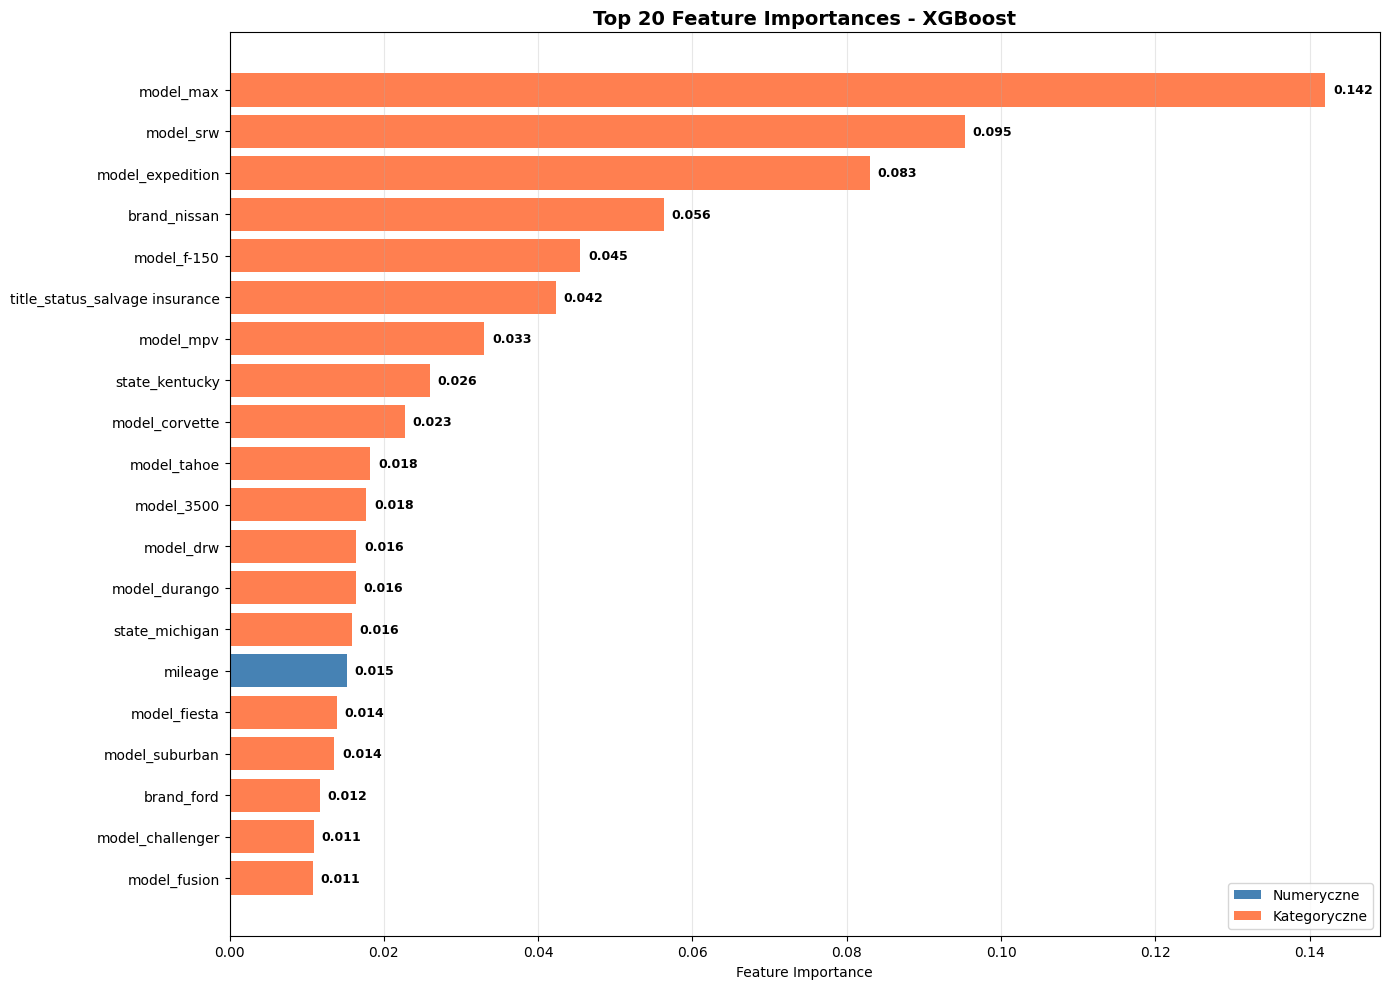

In [ ]:
feature_names = xgb_model.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
xgb_regressor = xgb_model.best_estimator_.named_steps['model']
importances = xgb_regressor.feature_importances_

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

top_20 = importance_df.head(20)

plt.figure(figsize=(14, 10))

colors = []
for feature in top_20['feature']:
    if feature.startswith('num__'):
        colors.append('steelblue')
    elif feature.startswith('cat__'):
        colors.append('coral')
    else:
        colors.append('gray')

plt.barh(range(len(top_20)), top_20['importance'], color=colors)

clean_names = [feature.replace('num__', '').replace('cat__', '') for feature in top_20['feature']]
plt.yticks(range(len(top_20)), clean_names)

plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - XGBoost',
          fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()

for i, (_, row) in enumerate(top_20.iterrows()):
    plt.text(row['importance'] + 0.001, i, f"{row['importance']:.3f}",
             va='center', fontsize=9, fontweight='bold')

plt.grid(axis='x', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Numeryczne'),
                   Patch(facecolor='coral', label='Kategoryczne')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

Kategoryczne cechy dominują (19/20 top cech), gdzie konkretne modele samochodów (model_max, model_srw, model_expedition) są najważniejsze dla ceny, podczas gdy jedyna numeryczna cecha w top 20 to przebieg - oznacza to, że prestiż konkretnego modelu bije parametry techniczne w kształtowaniu cen samochodów używanych.